Cars Data has Information about 3 brands/make of cars. Namely US, Japan, Europe. Target of the data set to find the brand of a car using the parameters such as horsepower, Cubic inches, Make year, etc.

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("Data/Unsupervised/cars.csv")




In [8]:
#Remove spaces from the Column names
dataset.columns = dataset.columns.str.strip()

#Check the data types of all columns
dataset.dtypes

mpg            float64
cylinders        int64
cubicinches      int64
hp               int64
weightlbs        int64
time-to-60       int64
year             int64
dtype: object

In [25]:
#feature_col_names = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']


#X = dataset[feature_col_names].values  
X = dataset.iloc[:, :].values

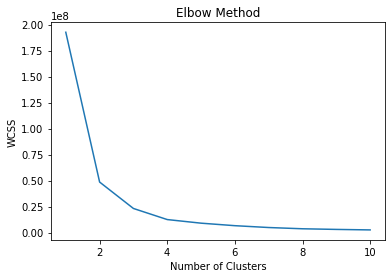

In [26]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Applying k-means to the cars dataset
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
model_predict = model.fit_predict(X)


In [30]:
print(model_predict)

[0 1 2 0 1 0 0 0 2 1 1 1 0 2 0 0 1 2 1 1 1 1 2 0 1 1 1 0 2 1 1 2 1 2 1 2 1
 1 0 2 0 0 2 2 2 1 0 1 1 2 0 2 2 1 0 0 2 1 1 0 2 1 2 1 0 2 1 1 1 0 2 1 1 1
 1 2 2 1 1 1 0 0 2 1 1 1 2 2 1 1 1 1 0 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 1 2 1
 2 0 1 1 0 2 2 1 0 1 1 0 2 1 1 0 1 1 1 1 1 0 2 0 0 1 2 2 2 1 1 1 1 2 2 2 2
 2 2 1 1 0 2 1 2 1 1 1 2 2 0 2 2 1 2 2 1 2 1 1 2 1 1 1 1 0 2 2 1 2 1 0 2 1
 2 2 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 2 2 1 0 1 2 0 2 2 2 1 1 2 1 1 0 1 0 2 2
 0 0 0 1 0 1 1 2 2 1 1 0 2 1 0 2 1 1 0 2 0 1 0 2 0 1 1 1 1 1 2 0 2 1 0 1 2
 2 2]


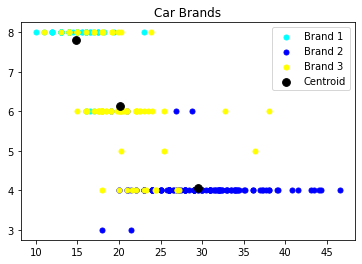

In [29]:
# Visualising the clusters
size = 25
plt.scatter(X[model_predict == 0, 0], X[model_predict == 0, 1], s = size, c = 'cyan', label = 'Brand 1')
plt.scatter(X[model_predict == 1, 0], X[model_predict == 1, 1], s = size, c = 'blue', label = 'Brand 2')
plt.scatter(X[model_predict == 2, 0], X[model_predict == 2, 1], s = size, c = 'yellow', label = 'Brand 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 60, c = 'black', label = 'Centroid')
plt.title('Car Brands')
plt.legend()
plt.show()